In [64]:
#https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
#cool code for a button to hide code 
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tabulate
import statistical_tools as s_tools
#plotting with seaborn
#https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/

test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

##### Titanic data exploration

So I'm looking to practice my data exploration skills but also formulating clean hypothesis that can be tested. I'm doing this while working through statistical-thinking on DataCamp. I want to play around with these techniques when I see them to get a feel for them

So when I grabbed this Titanic data, before even looking into the data, I had a thought (My knowledge influenced soley by the Movie!), that the woman and children were supposedly prioritized when the ship was sinking.

I will test this for Children and Women seperately

###### Children

So to put this in research terms I will say: <br />
My alternate hypothesis $\mu_a$ = Children had greater survival rates than the overall survival rates of passengers on board<br />
My Null hypothesis $\mu_0$ = Children had the same survival rates as the overall survival rates of passengers on board

Let's look quickly at the dataframe loaded from the 'test.csv' data

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Nice an deasy, we have a 1 or 0 for survived and didn't survive respectively, and the age in another column. 
So we want maybe good a good look at the distributions of those that did and didn't survive, just as a nice visual.

In [55]:
survived = train[train['Survived'] == 1]


Text(0, 0.5, 'Density')

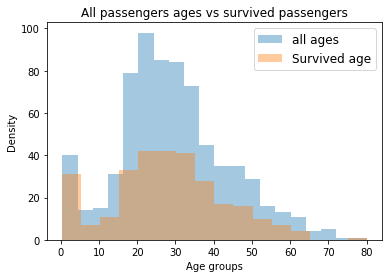

In [56]:

sns.distplot(train['Age'],  kde=False, label='all ages')
sns.distplot(survived['Age'],  kde=False,label='Survived age')

plt.legend(prop={'size': 12})
plt.title('All passengers ages vs survived passengers')
plt.xlabel('Age groups')
plt.ylabel('Density')

You can see here with this overlay of the surviving and non-surviving groups by age that there is a bigger gap between the middle ages compared to the children. This is heavily infavour of our hypothesis, but we can get a more detailed look than this. By seeing the rates (proportions saved) for each age bracket.

|    |   Age group |   Survival rate |   Group count |
|---:|------------:|----------------:|--------------:|
|  0 |           0 |        0.675    |            40 |
|  1 |           5 |        0.5      |            22 |
|  2 |          10 |        0.4375   |            16 |
|  3 |          15 |        0.395349 |            86 |
|  4 |          20 |        0.342105 |           114 |
|  5 |          25 |        0.358491 |           106 |
|  6 |          30 |        0.421053 |            95 |
|  7 |          35 |        0.458333 |            72 |
|  8 |          40 |        0.375    |            48 |
|  9 |          45 |        0.390244 |            41 |
| 10 |          50 |        0.4375   |            32 |
| 11 |          55 |        0.375    |            16 |
| 12 |          60 |        0.4      |            15 |
| 13 |          65 |        0        |             4 |
| 14 |          70 |        0        |             6 |
| 15 |          75 |        0        |             0 |
| 16 |    

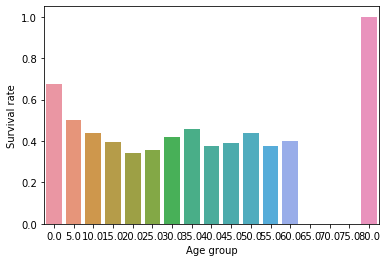

In [57]:
def age_group_plot_and_table(s, t):  
    perc_survived = np.empty(18)
    age_dict = {}
    totals_dict = {}
    #print(perc_survived)
    for i in np.linspace(0, 80, 17):
        #print(i)
        srv = s[(s['Age'] >= i) & (s['Age'] < (i + 5))]
        srv = srv['Age']
        total = t[(t['Age'] >= i) & (t['Age'] < i+5)]
        total = total['Age']

        if len(total.values) != 0:
            age_dict[i]  =  float(len(srv.values)/len(total.values))
            totals_dict[i] = len(total.values)
        else:
            age_dict[i]  =  float(0)
            totals_dict[i] = 0

    df = pd.DataFrame({'Age group': list(age_dict.keys()), 'Survival rate': list(age_dict.values()), 'Group count':  list(totals_dict.values())})

    sns.barplot(x = 'Age group', y = 'Survival rate', data = df)
    print(df.to_markdown()) 
    
    
age_group_plot_and_table(survived, train)

Here I've plotted the survival rates by age group, and also the table of these rates - this helps us interpet some extreme results such as the 100% survival rate of the >80 year olds, but we can see that there was only 1 of them, so not a great  sample size for that population!

But through the younger range we can a definite trending towards more survival roughly through the 0-15 years old range.

Now our null hypothesis was that all the rates were actually the same.

So we need to ask the questions:
<ul>
<li>How can we measure this objectively - and not just eyeball this graph (Another time analysing data, things might not be so clear cut)  </li>
<li>Using this measure, we can ask, what is the chance these observed differences are down to pure chance and variability?</li>
</ul>


So first, what was the total overall survival rate?


In [60]:
'Now let\'s simulate a group with the same survival rate, but with the assumption that there were no differences between age group survivals'
print('Overall suvival rate {}'.format(len(train[train['Survived'] == 1])/len(train['Survived'])))


Overall suvival rate 0.3838383838383838



So how we will test this, is we will take this data set and create 'Permutation Samples'. The picture below (Curtosy of DataCamps lessons on Statistical thinking) shows an example of this perumtation, we take this sample of data, where the red and blue represent 2 different categories (such as young and old people) and these different data categories have some other shared data type (in this picture we can just say some numerical measure).

![Permutation](permutation_example.jpg)

You then jumble up all of these numbers and act as if it is a new sample of the same data population (see a jumbled version below)


![Permutation](permutation_example_jumbled.jpg)

We can then use this new sample to calculate the same statistics as we did on the original data set, such as the survival rates.

Now we have our original empirical data which at the moment we think has variations that are not simply random (Children with a higher survival rate) and then new data, which is now jumbled and represents what these categories (Young and old) may look like in another random sample of a data set (with the assumption that the survival rates are are now evenly distributed across the different age groups - since we just jumbled up the rates between the categories).

In our testing we will actually calculate for these permutations the <b>different between young and old i.e (young_survival - old_survival)</b>.
<br />

Finally, we do this jumbling a large number of times, thus giving us a good distribution of the rates of this sample if it were constantly random. 

So now we have arrived where we wanted for the ability to do a significance test between the original data and the data that would represent a world where there is no difference between survival rates betweent he age groups (Our random rates world).

We can then take the mean of all of these permutation samples rates (rates of the difference between survival). And plot them as a probability distribution, this enables us to use our test statistic against our probability distribution.

That is, the probability of our Alternate hypothesis <b>given</b> our null hypothesis. Or the probability of the survival rate difference that we have oberved, if we assumed that the age groups actually did have an equal chance of survival (as seen in our random world).

This is written probabilistically as:
P($\mu_a$ | $\mu_0$) = 'p-value'



In [61]:
#lambda function for rate
def diff_rates(d1, d2):
    survival_rate =  lambda x: sum(x)/len(x)
    #I refrained from getting absolute value just to show that the permutations replicates will be normally distributed
    return (survival_rate(d2) - survival_rate(d1)) 

range_0_to_15 =  train[(train['Age'] >= 0) & (train['Age'] < (15))]
range_gt_or_eq_15 = train[(train['Age'] >= 15)]
#print(range_0_to_15)
#perm_sample1, perm_sample2 = s_tools.permutation_sample(range_0_to_15, range_gt_or_eq_15)

# Take 10,000 bootstrap replicates of the rate: calculating boostrap replicates
perm_replicates = s_tools.draw_perm_reps(range_0_to_15['Survived'], range_gt_or_eq_15['Survived'], diff_rates, size=10000)



Original rate would be miles off in the right side direction! 0.19170295113691332


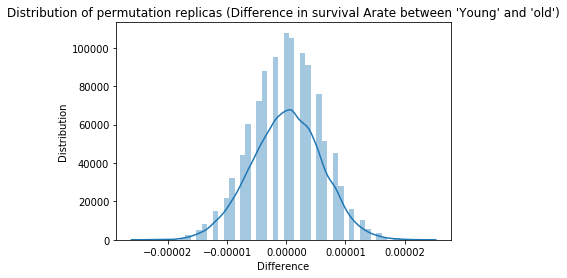

In [62]:
orig_rate =  survival_rate(range_0_to_15['Survived']) - survival_rate(range_gt_or_eq_15['Survived'])
norm_repl_data = np.true_divide(perm_replicates, len(perm_replicates))
sns.distplot(norm_repl_data)

plt.title('Distribution of permutation replicas (Difference in survival Arate between \'Young\' and \'old\')')
plt.xlabel('Difference')
plt.ylabel('Distribution')
print('Original rate would be miles off in the right side direction! {}'.format(orig_rate))

So above we can see this distribution of our samples, and of course in a world where everyone has an equal survival rate, therefore we would expect this to center around a mean of 0. And if we plotted our original survival rate (0.19), it would be out of the graph far off on the right-hand side. Our statistical test in terms of this graph asks the question, how much proportion of this distribution (in blue on the graph) would be equal or above our test statistic (the original survival difference). In this case, very little! Because original survival rate is so far above what would be considered a normal rate in our simulated world where we have assumed that all ages have equal survival chance.


In [67]:
# Compute p-value: p
print('Original rate difference {}'.format(orig_rate))
p = np.sum(perm_replicates >= orig_rate) / len(perm_replicates)
# Print the result
print('p-value = {}'.format(p, '.5f'))

Original rate difference 0.19170295113691332
p-value = 0.0006


Calculating that proportion gives us a p-value, and above we can see how low that p-value is, we could have set a specific significane cut of for the p-value such as 0.05, but in this case it is very low and we are satisified with it's significance. 

So in terms of language: This is the probability of getting at least a difference in young-old survival rate of '0.19', given assuming each age group had an equal chance of survival. 

So given that our probability of a rate of '0.19' at least is 0.0006%, we can safely say that this is a very rare result. So we reject the null hypothesis in favour of the Alternate hypothesis, this supports our information that young people were given priorty. 


We should now be able to do a similar test for the women

###### Women.....